In [6]:
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Connexion à la base
conn = mysql.connector.connect(
    host="localhost",
    user="root",
    password="HBas0617",
    database="classicmodels"
)

print("Connexion réussie !")

Connexion réussie !


In [ ]:
# ==================================================
# PARTIE 4 – ANALYSES PYTHON AVANCÉES
# ==================================================

In [7]:
# ==================================================
# 1. RFM (Recency, Frenquency, Monetary) 
# ==================================================

query_rfm = """
SELECT 
    c.customerNumber,
    c.customerName,
    MAX(o.orderDate) AS last_order,
    COUNT(o.orderNumber) AS frequency,
    SUM(od.quantityOrdered * od.priceEach) AS monetary
FROM customers c
JOIN orders o ON c.customerNumber = o.customerNumber
JOIN orderdetails od ON o.orderNumber = od.orderNumber
GROUP BY c.customerNumber, c.customerName
"""

df_rfm = pd.read_sql(query_rfm, conn)

# Calcul Recency
df_rfm["last_order"] = pd.to_datetime(df_rfm["last_order"])
df_rfm["recency"] = (pd.Timestamp.today() - df_rfm["last_order"]).dt.days

df_rfm.head()

/var/folders/zm/zwf7l6k56_b3wsp1v848_0nw0000gn/T/ipykernel_32779/3905923979.py:18: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_rfm = pd.read_sql(query_rfm, conn)


,customerNumber,customerName,last_order,frequency,monetary,recency
0,363,Online Diecast Creations Co.,2004-11-04,34,116449.29,7773
1,128,"Blauer See Auto, Co.",2004-11-05,22,75937.76,7772
2,181,Vitachrome Inc.,2004-11-05,25,72497.64,7772
3,121,Baane Mini Imports,2004-11-05,32,104224.79,7772
4,141,Euro+ Shopping Channel,2005-05-31,259,820689.54,7565


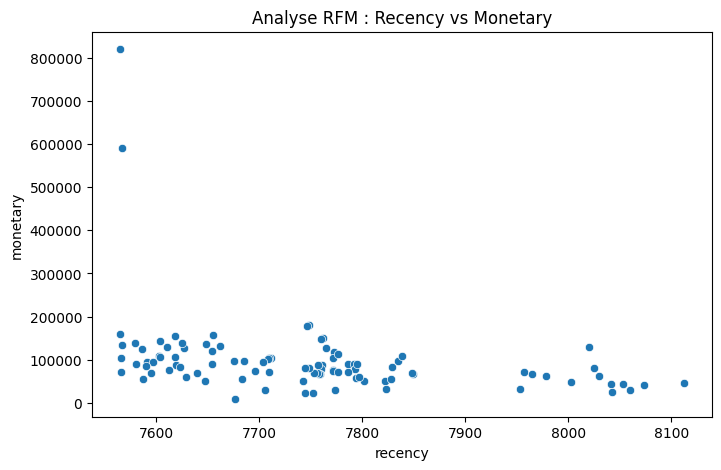

In [8]:
# Visualisation 

plt.figure(figsize=(8,5))
sns.scatterplot(data=df_rfm, x="recency", y="monetary")
plt.title("Analyse RFM : Recency vs Monetary")
plt.show()

/var/folders/zm/zwf7l6k56_b3wsp1v848_0nw0000gn/T/ipykernel_32779/2816966759.py:12: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_corr = pd.read_sql(query_corr, conn)


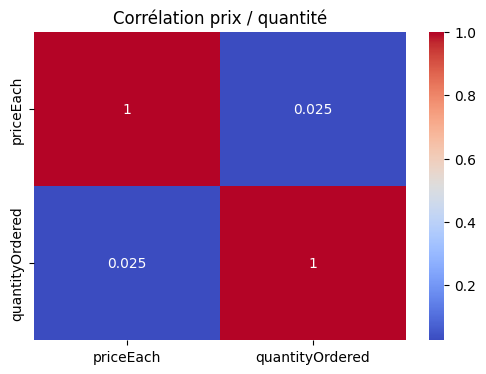

In [9]:
# ==================================================
# 2. Corrélation prix / quantité
# ==================================================

query_corr = """
SELECT 
    priceEach,
    quantityOrdered
FROM orderdetails
"""

df_corr = pd.read_sql(query_corr, conn)

plt.figure(figsize=(6,4))
sns.heatmap(df_corr.corr(), annot=True, cmap="coolwarm")
plt.title("Corrélation prix / quantité")
plt.show()

/var/folders/zm/zwf7l6k56_b3wsp1v848_0nw0000gn/T/ipykernel_32779/2123348175.py:15: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_trend = pd.read_sql(query_trend, conn)


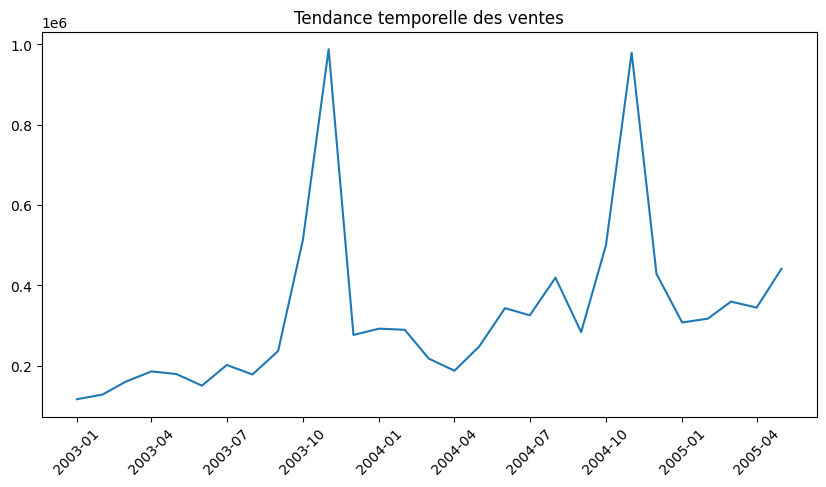

In [10]:
# ==================================================
# 3. Saisonnalité des ventes 
# ==================================================

query_trend = """
SELECT 
    DATE_FORMAT(orderDate, '%Y-%m') AS mois,
    SUM(quantityOrdered * priceEach) AS chiffre_affaires
FROM orders o
JOIN orderdetails od ON o.orderNumber = od.orderNumber
GROUP BY mois
ORDER BY mois
"""

df_trend = pd.read_sql(query_trend, conn)
df_trend["mois"] = pd.to_datetime(df_trend["mois"])

plt.figure(figsize=(10,5))
plt.plot(df_trend["mois"], df_trend["chiffre_affaires"])
plt.xticks(rotation=45)
plt.title("Tendance temporelle des ventes")
plt.show()

In [11]:
# ==================================================
# 4. Panier moyen
# ==================================================

query_panier = """
SELECT 
    o.orderNumber,
    SUM(od.quantityOrdered * od.priceEach) AS montant_commande
FROM orders o
JOIN orderdetails od ON o.orderNumber = od.orderNumber
GROUP BY o.orderNumber
"""

df_panier = pd.read_sql(query_panier, conn)

panier_moyen = df_panier["montant_commande"].mean()
print("Panier moyen :", round(panier_moyen,2))

Panier moyen : 29460.71


/var/folders/zm/zwf7l6k56_b3wsp1v848_0nw0000gn/T/ipykernel_32779/2244489399.py:14: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_panier = pd.read_sql(query_panier, conn)


/var/folders/zm/zwf7l6k56_b3wsp1v848_0nw0000gn/T/ipykernel_32779/90549291.py:18: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_emp = pd.read_sql(query_emp, conn)


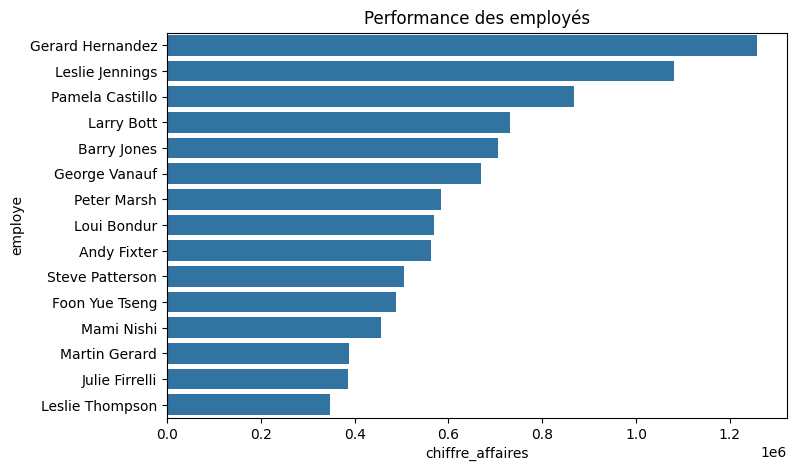

In [12]:
# ==================================================
# 5. Performance employés
# ==================================================

query_emp = """
SELECT 
    e.employeeNumber,
    CONCAT(e.firstName, ' ', e.lastName) AS employe,
    SUM(od.quantityOrdered * od.priceEach) AS chiffre_affaires
FROM employees e
JOIN customers c ON e.employeeNumber = c.salesRepEmployeeNumber
JOIN orders o ON c.customerNumber = o.customerNumber
JOIN orderdetails od ON o.orderNumber = od.orderNumber
GROUP BY e.employeeNumber
ORDER BY chiffre_affaires DESC
"""

df_emp = pd.read_sql(query_emp, conn)

plt.figure(figsize=(8,5))
sns.barplot(data=df_emp, x="chiffre_affaires", y="employe")
plt.title("Performance des employés")
plt.show()